<a href="https://colab.research.google.com/github/OumaimaHammadi/React_Tutorial_from_W3schools/blob/main/TP%20Tensorflow%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
from tensorflow import keras
# Chargement des données MNIST
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

print('trainset:', X_train.shape) # 60,000 images
print('testset:', X_test.shape) # 10,000 images
# Normalisation des données
X_train = X_train / 255
X_test = X_test / 255


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
trainset: (60000, 28, 28)
testset: (10000, 28, 28)


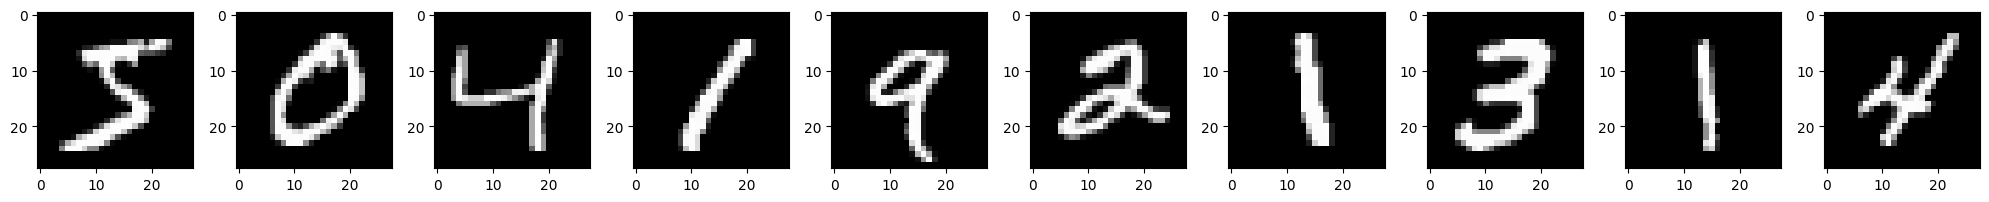

In [ ]:
# visualisation de quelques images
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 4))
for i in range(10):
  ax[i].imshow(X_train[i], cmap='gray')
  plt.tight_layout()
plt.show()

In [ ]:
# Configuration des couches du réseau
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(10)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compilation du modele
model.compile(optimizer='adam',loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
# Entrainement du modele
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8818 - loss: 0.3999
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9695 - loss: 0.0995
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9791 - loss: 0.0656
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9843 - loss: 0.0484
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9873 - loss: 0.0372
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9900 - loss: 0.0297
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9913 - loss: 0.0268
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9933 - loss: 0.0203
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9943 - loss: 0.0166
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9948 - loss: 0.0159


In [ ]:
# Evaluation du modele
test_loss, test_acc = model.evaluate(X_test,y_test)
print('Test accuracy:', test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9725 - loss: 0.1188
Test accuracy: 0.9761999845504761


In [ ]:
# modele prédictif (softmax)
prediction_model = keras.Sequential([model, keras.layers.Softmax()])
predict_proba = prediction_model.predict(X_test)
predictions = np.argmax(predict_proba, axis=1)
print(predictions[:10])
print(y_test[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]
